In [7]:
import tensorflow as tf

import matplotlib.pyplot as plt

import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

tf.__version__


'1.13.1'

In [8]:
mnist =  tf.keras.datasets.mnist

In [9]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

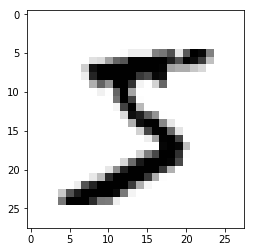

In [10]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [11]:
#Numbers are  ranging between 0-255. lets try to normalize it.
x_train =  tf.keras.utils.normalize(x_train,axis = 1)
x_test =  tf.keras.utils.normalize(x_test,axis = 1)

In [12]:
model = Sequential() 
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.compile(Adam(lr= 0.0001), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model.fit(x_train,y_train,epochs = 3)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
60000/60000 [==============================] - 3s 42us/step - loss: 0.6619 - acc: 0.8343
Epoch 2/3
60000/60000 [==============================] - 2s 40us/step - loss: 0.2753 - acc: 0.9221
Epoch 3/3
60000/60000 [==============================] - 2s 38us/step - loss: 0.2233 - acc: 0.9355


In [16]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 16us/step
0.20511120049059392 0.9413


In [17]:
x_train.shape

(60000, 28, 28)

In [44]:
model.fit(x_train,y_train,validation_split=0.1, batch_size =  10, epochs = 5, shuffle=True, verbose= 2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 6s - loss: 0.2048 - acc: 0.9416 - val_loss: 0.1499 - val_acc: 0.9550
Epoch 2/5
 - 6s - loss: 0.1593 - acc: 0.9527 - val_loss: 0.1304 - val_acc: 0.9628
Epoch 3/5
 - 6s - loss: 0.1301 - acc: 0.9619 - val_loss: 0.1133 - val_acc: 0.9670
Epoch 4/5
 - 6s - loss: 0.1096 - acc: 0.9674 - val_loss: 0.1032 - val_acc: 0.9692
Epoch 5/5
 - 6s - loss: 0.0942 - acc: 0.9720 - val_loss: 0.0975 - val_acc: 0.9725


# Saving the model

In [46]:
model.save('number.model')

In [47]:
#Loading the model
new_model = tf.keras.models.load_model("number.model")

In [49]:
predictions = new_model.predict(x_test)

In [50]:
print(predictions)
# Here each row is a probability distribution of values. To get the most probable value

[[9.2024514e-08 2.4511428e-07 3.1287811e-05 ... 9.9853921e-01
  4.3243385e-06 1.6401154e-05]
 [1.2526579e-06 3.5618485e-03 9.9538666e-01 ... 2.2637515e-08
  1.4740054e-06 1.2687472e-09]
 [1.2410898e-06 9.9630558e-01 9.0575207e-04 ... 3.2124409e-04
  9.7440276e-04 1.1004148e-05]
 ...
 [2.1112828e-07 5.5153924e-07 1.4565476e-06 ... 3.9564668e-05
  4.8029303e-04 1.3207549e-03]
 [1.0651914e-05 5.3468452e-06 6.9306014e-07 ... 2.7783547e-06
  1.6107443e-03 3.1815452e-07]
 [2.0338560e-04 1.9730571e-07 1.5825992e-04 ... 1.4979502e-08
  3.4489956e-06 5.0940457e-07]]


In [52]:
import numpy as np

np.argmax(predictions[0])

7

In [53]:
rounded_predictions  = new_model.predict_classes(x_test, batch_size=10, verbose=2)

 - 0s


In [54]:
rounded_predictions

array([7, 2, 1, ..., 4, 5, 6])

# loading external data

In [56]:
import cv2